In [2]:
from __future__ import print_function

In [3]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Loading the csv data directly from the URL and finding the number of rows of data
df = pd.read_csv("https://data.cityofnewyork.us/api/views/5gde-fmj3/rows.csv?accessType=DOWNLOAD")
print(len(df))

14112


In [13]:
# Printing the top 7 rows
df.head(7)

,BBL,Street Number,Street Name,Borough,Postcode,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),...,Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,BIN,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1000010010,1.0,GOVERNORS ISLAND,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,40.690096,-74.012866,1.0,1.0,5.0,park-cemetery-etc-Manhattan ...
1,1000020002,NaN,MARGINAL STREET,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000047501,1.0,WATER STREET,MANHATTAN,10004,Yes,41.0,102.0,287.9,16.37,...,2428325.0,Office,1,1000005,40.702444,-74.012742,1.0,1.0,9.0,Battery Park City-Lower Manhattan ...
3,1000057501,125.0,BROAD STREET,MANHATTAN,10004,Yes,3871.0,119.6,261.5,NaN,...,1338000.0,Office,1,1000006,40.702112,-74.011249,1.0,1.0,9.0,Battery Park City-Lower Manhattan ...
4,1003620001,134.0,AVENUE D,MANHATTAN,10009,Yes,8312.0,30.3,85.7,1.57,...,5207812.0,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...,40.724447,-73.975464,3.0,2.0,24.0,Lower East Side ...
5,1000090001,34.0,WHITEHALL STREET,MANHATTAN,10004,Yes,8575.0,99.5,302.6,NaN,...,852840.0,Office,1,1000018,40.703034,-74.012991,1.0,1.0,9.0,Battery Park City-Lower Manhattan ...
6,1000090014,17.0,STATE STREET,MANHATTAN,10004,Yes,735.0,79.7,210.0,NaN,...,574095.0,Office,1,1000020,40.702798,-74.014246,1.0,1.0,9.0,Battery Park City-Lower Manhattan ...


In [7]:
# Getting the list of all column headers
print(list(df))

['BBL', 'Street Number', 'Street Name', 'Borough', 'Postcode', 'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)', 'Weather Normalized Source EUI(kBtu/ft2)', 'Indoor Water Intensity (All Water Sources)(gal/ft2)', 'Reported Water Method', 'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)', 'Property Floor Area (Buildngs and Parking)(ft2)', 'Primary Property Type - Self Selected', 'Number of Buildings', 'BIN', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'NTA']


In [116]:
# Removing all columns from the dataframe except for the two numerical columns I want to keep
df = df[['Site EUI(kBtu/ft2)','Total GHG Emissions(MtCO2e)']]
df.head(7)

,Site EUI(kBtu/ft2),Total GHG Emissions(MtCO2e)
0,NaN,NaN
1,NaN,NaN
2,102.0,25932.68
3,119.6,11637.42
4,30.3,13709.99
5,99.5,7771.16
6,79.7,4033.53


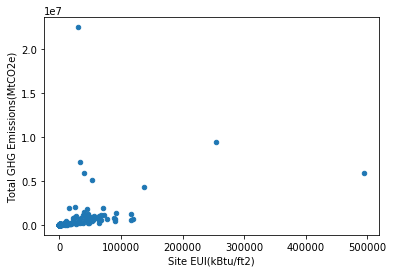

In [117]:
# Plotting the data
df.plot(kind='scatter',x='Site EUI(kBtu/ft2)',y='Total GHG Emissions(MtCO2e)')
plt.show()

## Data Overview:

This data set, published on NYC Open Data, includes the annual energy and water usage for commercial and residential buildings in NYC. Note that the data does not include the energy and water usage for all buildings in NYC, only "tax lots with a single building with a gross floor area greater than 50,000 sq ft and tax lots having more than one building with a gross floor area of more than 100,000 sq ft." Also note that the energy and water usage amounts are self-reported.

### Initial Analysis:

The plot above reflects two columns from the original data set: the amount of energy consumed at a particular building per square foot and the total direct and indirect greenhouse gases emitted due to energy used by the property. However, as you can see in the plot above, outliers make the plot difficult to interpret. Therefore, in the next few cells, I calculated the mean and standard deviation for the energy usage per square foot (the x axis) and then replot the data in order to make it more intelligible.

In [118]:
# Since the above plot is skewed by outliers, find the mean and standard deviation for the plot below.
mn = df['Site EUI(kBtu/ft2)'].mean()
sd = df['Site EUI(kBtu/ft2)'].std()
print(mn)
print(sd)

441.91851183
6792.63589531


In [119]:
# Creating a new dataframe that only includes points on the x axis that are below or above 2 standard deviations
# from the mean.
df_no_outliers = df[(df['Site EUI(kBtu/ft2)'] >= mn - 2*sd) & (df['Site EUI(kBtu/ft2)'] <= mn + 2*sd)]

In [120]:
print(df_no_outliers['Site EUI(kBtu/ft2)'].max())
print(df_no_outliers['Site EUI(kBtu/ft2)'].min())

13880.3
0.0


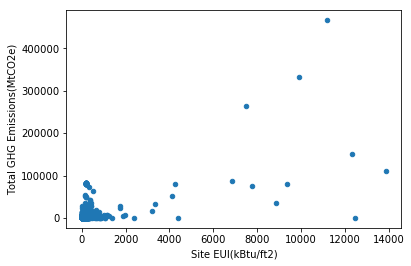

In [122]:
df_no_outliers.plot(kind='scatter',x='Site EUI(kBtu/ft2)',y='Total GHG Emissions(MtCO2e)')
plt.show()

### Interpretation:

Even after reducing the data on the x axis to within 2 standard deviations of the mean, the plot is still difficult to interpret. In the final cells (below), I only include data in which the x value is greater than 1.

In [123]:
# Reducing the dataframe to only include data with an x value greater than 1.
df_no_outliers = df_no_outliers[df_no_outliers['Site EUI(kBtu/ft2)'] > 1]

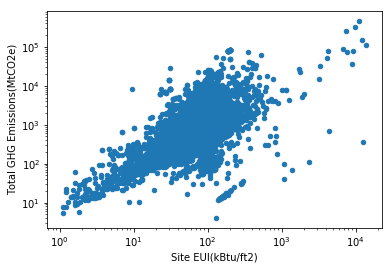

In [124]:
# Final plot with logarithmic scales for the x and y axis
df_no_outliers.plot(kind='scatter',x='Site EUI(kBtu/ft2)',y='Total GHG Emissions(MtCO2e)', logx=True, logy=True)
plt.show()

## Final Analysis:

As you can see in the plot above, there is a strong positive correlation between the energy usage of a particular building and the total amount of greenhouse gas emissions produced by that property. This result makes sense intuitively.